In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('salaries.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [6]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [7]:
df.duplicated().sum()

np.int64(52997)

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,105434.000000,1.054340e+05,105434.000000,105434.000000
mean,2024.188981,1.626908e+05,158018.514179,21.103249
std,0.669665,2.137236e+05,74401.714026,40.714744
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.064000e+05,106400.000000,0.000000
50%,2024.000000,1.471000e+05,147000.000000,0.000000
75%,2025.000000,1.997000e+05,199000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


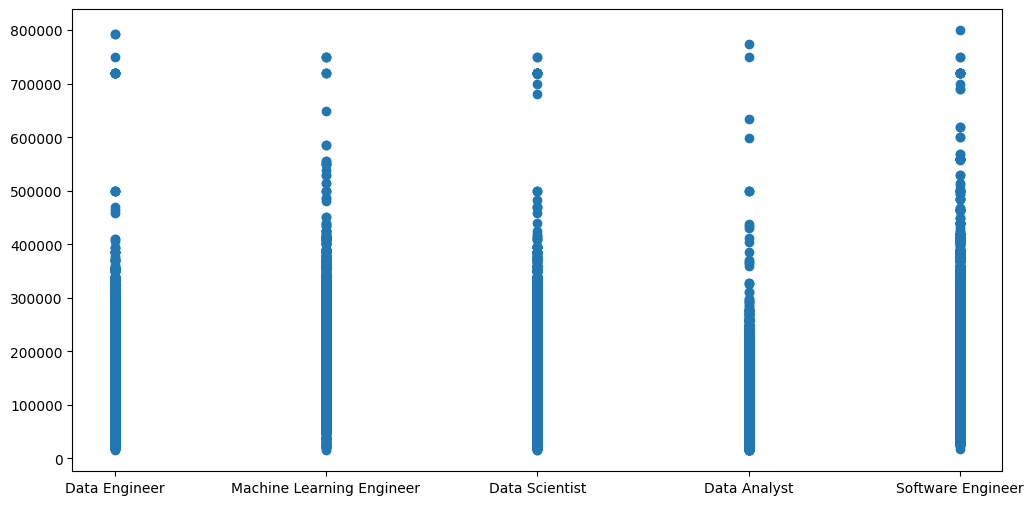

In [9]:
top_job=df['job_title'].value_counts().head().index
subset=df[df['job_title'].isin(top_job)]
plt.figure(figsize=(12,6))
plt.scatter(subset['job_title'],subset['salary_in_usd'])



<Axes: xlabel='company_size', ylabel='salary_in_usd'>

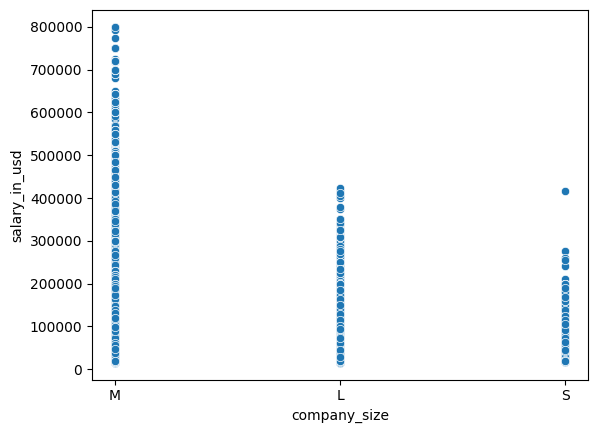

In [10]:
sns.scatterplot(x='company_size',y='salary_in_usd',data=df)

<Axes: >

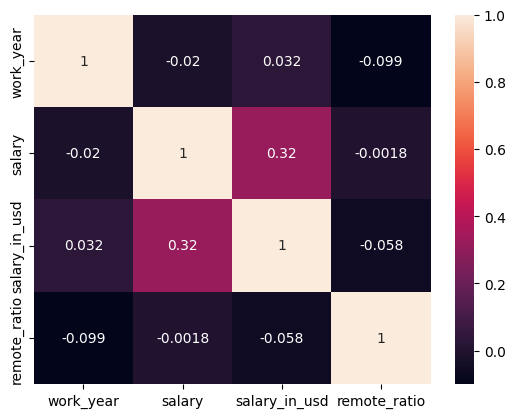

In [11]:
from numpy._core import numeric
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='work_year', ylabel='Count'>

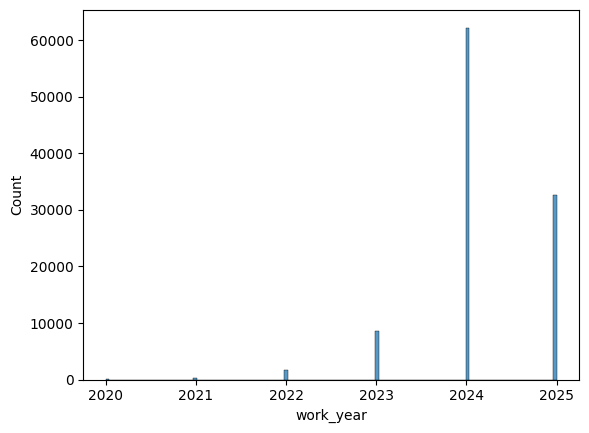

In [12]:
sns.histplot(df['work_year'])

<Axes: xlabel='count', ylabel='company_size'>

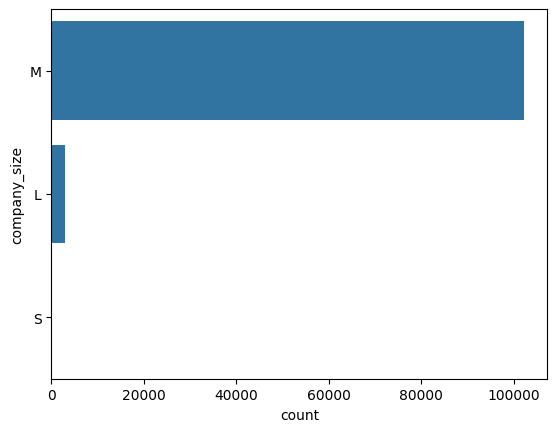

In [13]:
sns.countplot(df["company_size"])

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

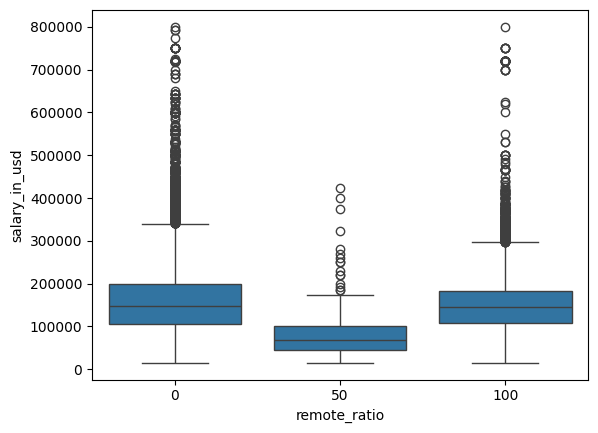

In [14]:
sns.boxplot(x="remote_ratio",y="salary_in_usd",data=df)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

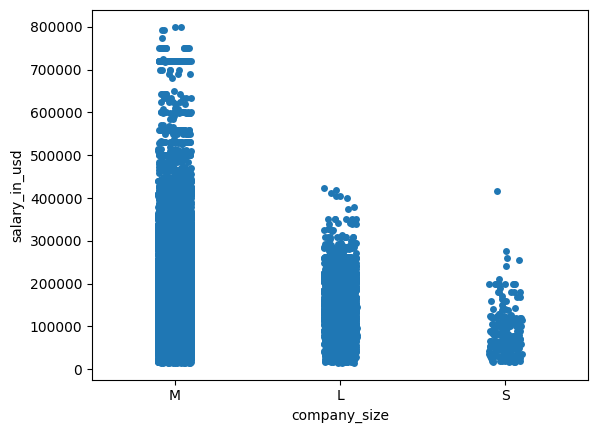

In [15]:
sns.stripplot(x='company_size',y='salary_in_usd',data=df)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
cols=["experience_level","employment_type","job_title","salary_currency","employee_residence","company_location","company_size"]



In [18]:
for i in cols:
  le.fit(df[i])
  df[i]=le.transform(df[i])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   work_year           105434 non-null  int64
 1   experience_level    105434 non-null  int64
 2   employment_type     105434 non-null  int64
 3   job_title           105434 non-null  int64
 4   salary              105434 non-null  int64
 5   salary_currency     105434 non-null  int64
 6   salary_in_usd       105434 non-null  int64
 7   employee_residence  105434 non-null  int64
 8   remote_ratio        105434 non-null  int64
 9   company_location    105434 non-null  int64
 10  company_size        105434 non-null  int64
dtypes: int64(11)
memory usage: 8.8 MB


In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,0,2,96,65664,7,69120,64,0,62,1
1,2025,0,2,96,47652,7,50160,64,0,62,1
2,2025,0,2,115,158113,24,158113,91,0,86,1
3,2025,0,2,115,87795,24,87795,91,0,86,1
4,2025,1,2,115,351410,24,351410,91,0,86,1


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()
df=ss.fit_transform(df)

In [23]:
import numpy as np
X= np.delete(df, 6, axis=1) # Assuming 'salary_in_usd' was at index 6
y = df[:, 6]

In [24]:

from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression,Ridge

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_prad=lr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [30]:
print(r2_score(y_test, y_prad))
print(mean_squared_error(y_test, y_prad))
print(mean_absolute_error(y_test, y_prad))


0.28718168654498644
0.7254402563230385
0.6183078759056347


In [31]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
ridge_param={
    "alpha":[0.1,1,10,50,100]
}

In [32]:
ridge_search=GridSearchCV(ridge,ridge_param,cv=5)
ridge_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100]})

In [33]:
best_ridge=ridge_search.best_estimator_

In [34]:
print(r2_score(y_test, y_prad))
print(mean_squared_error(y_test, y_prad))
print(mean_absolute_error(y_test, y_prad))


0.28718168654498644
0.7254402563230385
0.6183078759056347


In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
kn=KNeighborsRegressor(n_neighbors=1)

In [37]:
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [38]:
y_prad=kn.predict(X_test)

In [39]:
print(r2_score(y_test, y_prad))
print(mean_squared_error(y_test, y_prad))
print(mean_absolute_error(y_test, y_prad))


0.982686262158088
0.01762031387362668
0.026196360262573454


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt=DecisionTreeRegressor()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [43]:
y_prad=dt.predict(X_test)

In [44]:
print(r2_score(y_test, y_prad))
print(mean_squared_error(y_test, y_prad))
print(mean_absolute_error(y_test, y_prad))


0.9910406901554559
0.009117953211107732
0.0027862227109106837


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
y_prad=rf.predict(X_test)

In [48]:
print(r2_score(y_test, y_prad))
print(mean_squared_error(y_test, y_prad))
print(mean_absolute_error(y_test, y_prad))


0.9906917635019206
0.00947305834266888
0.0038277387948975235


In [48]:
import joblib

In [57]:

import pickle

In [63]:
import pickle

filename = "model_prediction.pkl"

with open(filename, "wb") as file:
    pickle.dump(rf, file)

print("Model saved as model_prediction.pkl")


Model saved as model_prediction.pkl
